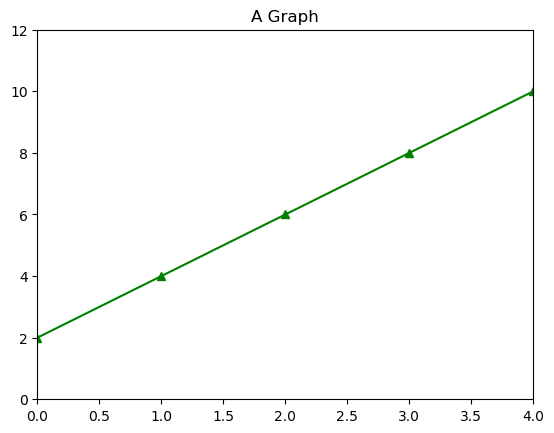

In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot([2,4,6,8,10],'g^',[2,4,6,8,10],'g')
plt.axis([0,4,0,12])
plt.title('A Graph')
plt.show()

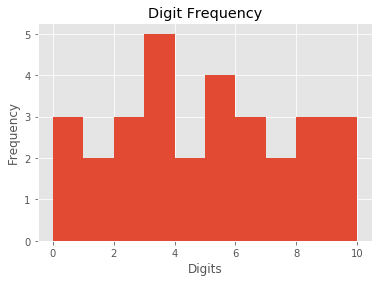

In [6]:
import pandas as pd
data=pd.read_csv('digits.txt',header=None)
plt.style.use('ggplot')
plt.ylabel('Frequency')
plt.xlabel('Digits')
plt.hist(data.values,bins=range(0,11),range=10)
plt.title('Digit Frequency')
plt.show()


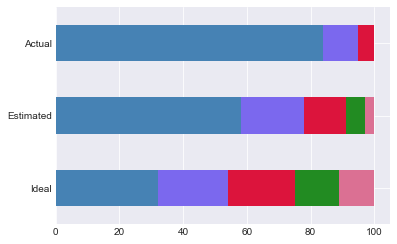

In [8]:
import numpy as np
one=[32,58,84]
two=[54,78,95]
three=[75,91,100]
four=[89,97,100]
five=[100,100,100]
x=np.arange(3)
width=.5
plt.style.use('seaborn-darkgrid')
p1=plt.barh(x,five,width,color='palevioletred')
p2=plt.barh(x,four,width,color='forestgreen')
p3=plt.barh(x,three,width,color='crimson')
p4=plt.barh(x,two,width,color='mediumslateblue')
p5=plt.barh(x,one,width,color='steelblue',tick_label=['Ideal','Estimated','Actual'])
plt.axis([0,105,-.5,2.5])
plt.show()

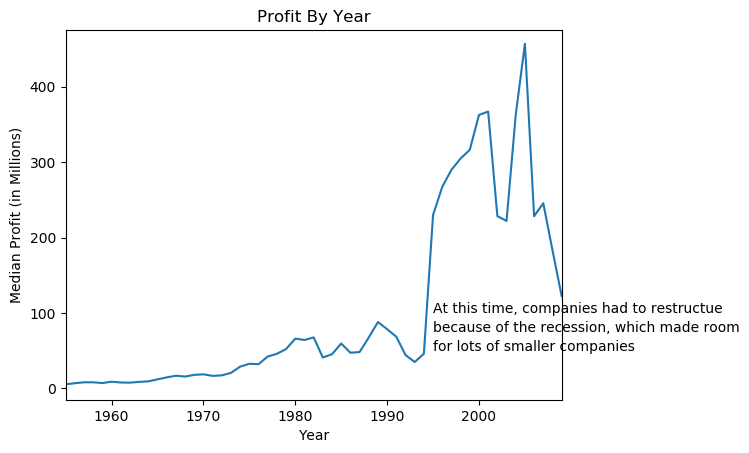

In [17]:
data=pd.read_csv('fortune500.csv')
data=data[['Year','Profit (in millions)']]
data.columns=['Year','Profit']
data['Profit']=pd.to_numeric(data['Profit'], errors='coerce')
data=data.groupby(['Year']).median()
plt.plot(data.index,data['Profit'])
plt.ylabel('Median Profit (in Millions)')
plt.xlabel('Year')
plt.title('Profit By Year')
plt.style.use('default')
plt.axis([1955,2009,-15,475])
plt.annotate('At this time, companies had to restructue',xy=[1995,100])
plt.annotate('because of the recession, which made room',xy=[1995,75])
plt.annotate('for lots of smaller companies',xy=[1995,50])
plt.show()

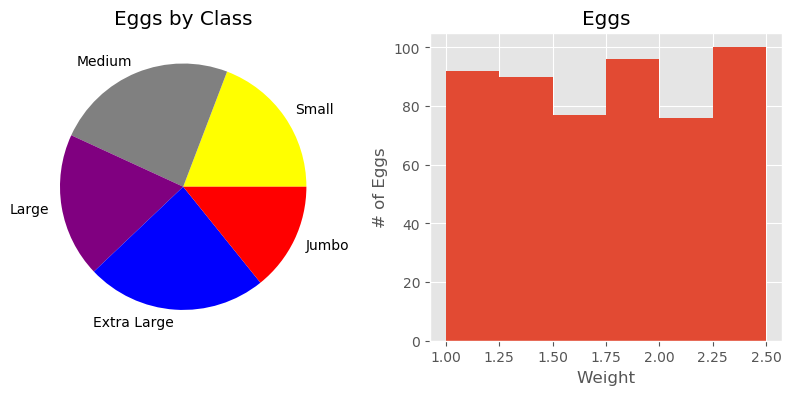

In [9]:
x='eggs.txt'
def eggs(x):
    data=pd.read_csv(x,header=None)
    data.columns=['Eggs']
    data['Small']=data[(data['Eggs']>=1.5) & (data['Eggs']<1.75)]
    data['Medium']=data[(data['Eggs']>=1.75) & (data['Eggs']<2)]['Eggs']
    data['Large']=data[(data['Eggs']>=2) & (data['Eggs']<2.25)]['Eggs']
    data['Extra Large']=data[(data['Eggs']>=2.25) & (data['Eggs']<2.5)]['Eggs']
    data['Jumbo']=data[(data['Eggs']>=2.5)]['Eggs']

    small=data[~data['Small'].isnull()]['Small']
    medium=data[~data['Medium'].isnull()]['Medium']
    large=data[~data['Large'].isnull()]['Large']
    xlarge=data[~data['Extra Large'].isnull()]['Extra Large']
    jumbo=data[~data['Jumbo'].isnull()]['Jumbo']

    labels='Small','Medium','Large','Extra Large','Jumbo'
    sizes=[len(small),len(medium),len(large),len(xlarge),len(jumbo)]
    colors=['yellow','grey','purple','blue','red']
    plt.figure(figsize=[10,4])
    plt.subplot(121)
    plt.pie(sizes,labels=labels,colors=colors)
    plt.title('Eggs by Class')
    plt.subplot(122)
    plt.style.use('ggplot')
    plt.hist(data['Eggs'],bins=[1,1.25,1.5,1.75,2,2.25,2.5])
    plt.title('Eggs')
    plt.ylabel('# of Eggs')
    plt.xlabel('Weight')
    plt.show()
eggs(x)

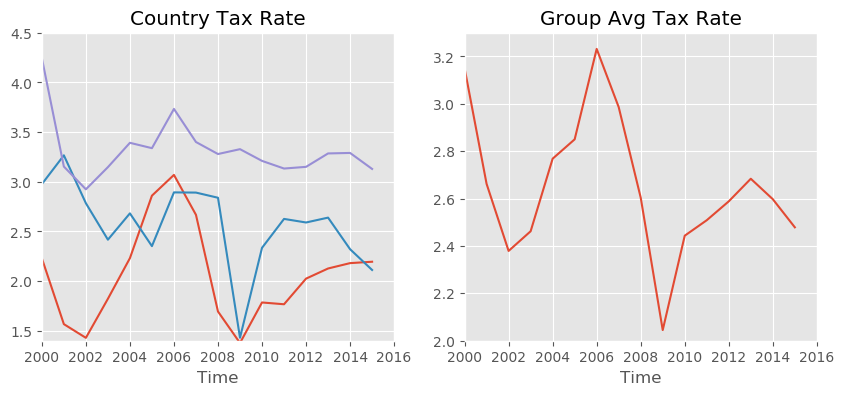

In [20]:
x='corp_tax.csv'
y=['USA','FRA','CAN']
def plot_tax_rates(x,y):
    data=pd.read_csv(x,index_col=[5])
    for t in y:
        data[t]=data[data['LOCATION']==t]['Value']
    data=data.drop(['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','Value','Flag Codes'],axis=1) 
    data['Avg']=data.mean(axis=1)
    data=data.drop_duplicates()
    plt.figure(figsize=[10,4])
    plt.subplot(121)
    for t in y:
        plt.plot(data.index,data[t])
    plt.title('Country Tax Rate')
    plt.xlabel('Time')
    plt.axis([2000,2016,1.4,4.5])
    plt.subplot(122)
    plt.title('Group Avg Tax Rate')
    plt.xlabel('Time')
    plt.plot(data.index,data['Avg'])
    plt.axis([2000,2016,2,3.3])
    
plot_tax_rates(x,y)